## Smallest nonzero persistent eigenvalue of a filtration

In [1]:
import tadasets
from persistent_laplacians.eigenvalues import compute_eigenvalues 
sphere = tadasets.dsphere(n=50, d=2, r=2, noise=0.1, seed=42)

In [2]:
result = compute_eigenvalues(sphere, num_indices=10, use_scipy=True, use_stepwise_schur=False, zero_tol=1e-6)

defaultdict(<class 'list'>, {0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1: [0.00416850490275163, 0.00496802297617577, 0.00850049483488928, 0.013209314002779946, 0.03206935709690459, 0.038602895943678474, 0.04144689917748556, 0.04188959328337816, 0.045768046709665895, 0.04875001611516604, 0.050559504809133585, 0.05392710140727955, 0.05575788799743987, 0.05648098087084166, 0.058326421413224055, 0.05923346628133189, 0.06686211172741043, 0.08207873671334759, 0.08383048104841664, 0.09238942371473632, 0.09326583830230775, 0.09613372590984534, 0.09624822647719644, 0.09769459408876624, 0.09988859627117615, 0.10597483863709226, 0.10978828614754793, 0.11091320582588278, 0.11210775564725742, 0.11379165256903187, 0.12153431071102332, 0.1218617366133998, 0.12212136688374944, 0.1246799874345

/Users/marcelmasque/University/other/persistent_laplacians/python/persistent_laplacians/eigenvalues.py:7: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  return pl.smallest_eigenvalue(


## Plot nonpersistent eigenvalues (dim 2)

[0.0867876791754324, 0.162058611372966, 0.19879065922056996, 0.2888474714564848, 0.30177766767302405, 0.4709454967864061, 0.7285485716978695, 1.0, 1.4130940157074883]


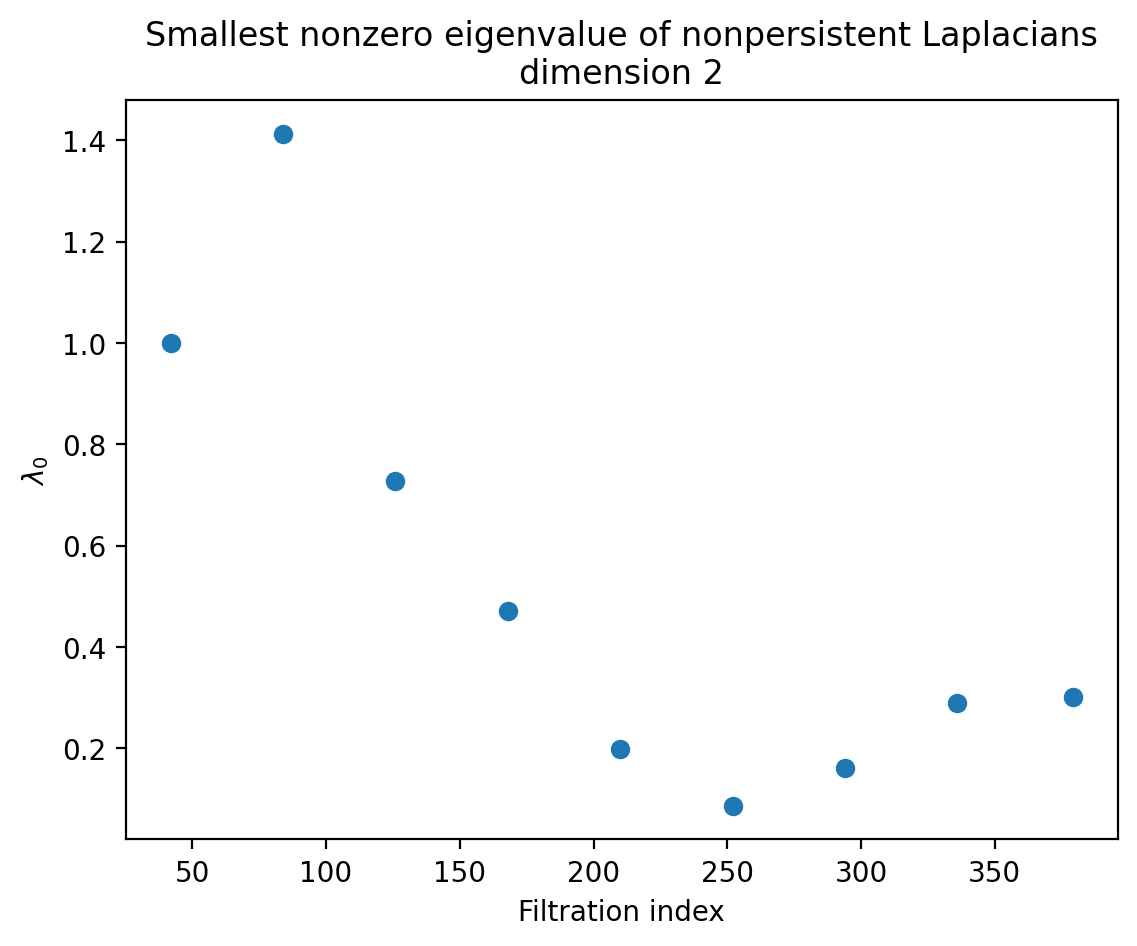

In [3]:
import matplotlib.pyplot as plt
nonpersistent = {k[0]: v[0] for (k, v) in result[2].items() if k[0] == k[1] and len(v) >= 1}
plt.figure(dpi=200)
plt.scatter(nonpersistent.keys(), nonpersistent.values())
plt.title(r"Smallest nonzero eigenvalue of nonpersistent Laplacians" + "\n" + "dimension 2")
plt.xlabel("Filtration index")
plt.ylabel(r"$\lambda_0$")

eigenvalues = sorted(nonpersistent.values())

print(eigenvalues)

## Persistent smallest nonzero eigenvalues

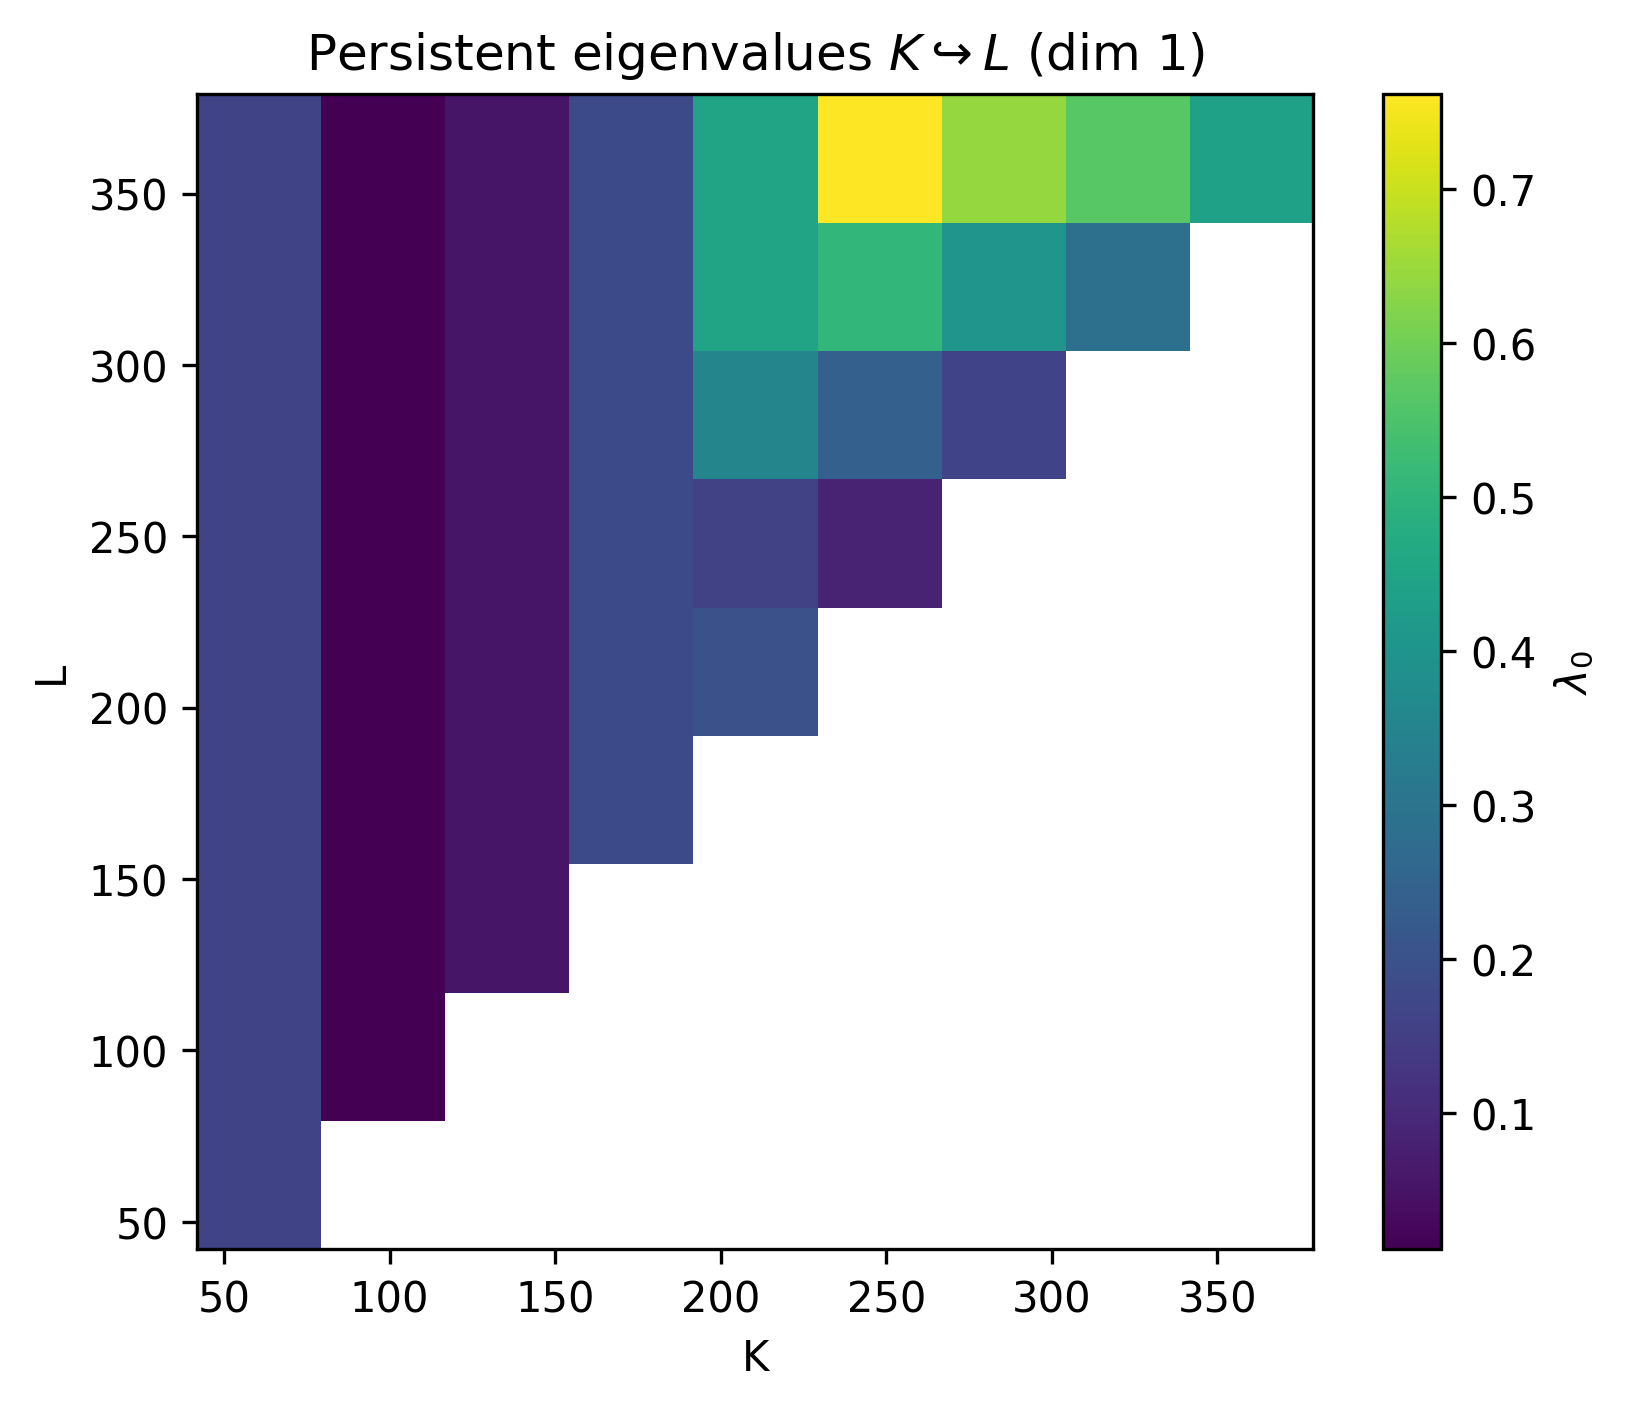

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Raw data
pts = {k: v for (k, v) in result[1].items() if len(v) >= 1}

# 1) Build sorted unique axes
xs = sorted({x for x, y in pts})
ys = sorted({y for x, y in pts})

# 2) Create matrix of NaNs
heat = np.full((len(ys), len(xs)), np.nan)

# 3) Fill matrix: row = y-index, col = x-index
x_i = {x:i for i,x in enumerate(xs)}
y_i = {y:i for i,y in enumerate(ys)}
for (x,y), v in pts.items():
    heat[y_i[y], x_i[x]] = v[0]

# 4) Plot as heatmap (no interpolation)
plt.figure(figsize=(6,5), dpi=300)
plt.imshow(
    heat,
    origin='lower',
    extent=(min(xs), max(xs), min(ys), max(ys)),
    aspect='auto'
)
plt.colorbar(label=r'$\lambda_0$')
plt.xlabel('K')
plt.ylabel('L')
plt.title(r'Persistent eigenvalues $K \hookrightarrow L$ (dim 1)')
plt.show()